In [94]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [95]:
df=pd.read_csv('cardf_cleaned.csv')  
print(df.shape)
df.head()

(719, 13)


,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,2,21,4.0,2.2,2,2,26,24,33,0,1993
1,1,19,2,22,4.0,2.2,2,2,27,24,33,1,1993
2,2,16,2,19,6.0,3.0,2,2,22,24,33,0,1993
3,3,16,2,18,6.0,3.0,2,2,22,24,33,1,1993
4,4,18,4,21,4.0,2.2,2,2,26,24,33,0,1993


In [96]:
# Dropping rows from the DataFrame where 'fuel_type' is 'Diesel'
df = df[df['fuel_type'] != 0]

# Display the resulting DataFrame
df

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,2,21,4.000000,2.200000,2,2,26,24,33,0,1993
1,1,19,2,22,4.000000,2.200000,2,2,27,24,33,1,1993
2,2,16,2,19,6.000000,3.000000,2,2,22,24,33,0,1993
3,3,16,2,18,6.000000,3.000000,2,2,22,24,33,1,1993
4,4,18,4,21,4.000000,2.200000,2,2,26,24,33,0,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,714,80,8,76,5.154622,2.760336,0,1,72,9,60,0,2021
715,715,89,8,85,5.154622,2.760336,0,1,82,9,60,0,2023
716,716,79,8,76,5.154622,2.760336,0,1,72,9,60,0,2023
717,717,74,12,70,5.154622,2.760336,0,1,66,20,102,0,2022


In [97]:
# LOOK AT FIRST ROW
print(df.iloc[0])

Unnamed: 0            0.0
city_mpg             18.0
class                 2.0
combination_mpg      21.0
cylinders             4.0
displacement          2.2
drive                 2.0
fuel_type             2.0
highway_mpg          26.0
make                 24.0
model                33.0
transmission          0.0
year               1993.0
Name: 0, dtype: float64


In [98]:
# INSERT CODE TO PRINT ITS SHAPE AND COLUMN NAMES

print(df.shape)
df.columns

(714, 13)


Index(['Unnamed: 0', 'city_mpg', 'class', 'combination_mpg', 'cylinders',
       'displacement', 'drive', 'fuel_type', 'highway_mpg', 'make', 'model',
       'transmission', 'year'],
      dtype='object')

In [99]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 

summary = df.describe().T  
summary['dtypes'] = df.dtypes 
summary = summary[['dtypes', 'min', 'mean', 'max']]  
print(summary)

                  dtypes     min         mean     max
Unnamed: 0         int64     0.0   358.282913   718.0
city_mpg           int64     9.0    34.099440   150.0
class              int64     0.0     7.614846    15.0
combination_mpg    int64    11.0    35.127451   136.0
cylinders        float64     3.0     5.159906    10.0
displacement     float64     1.4     2.765100     6.2
drive              int64     0.0     1.813725     3.0
fuel_type          int64     1.0     1.833333     2.0
highway_mpg        int64    12.0    37.345938   123.0
make               int64     0.0    13.113445    26.0
model              int64     0.0    74.015406   150.0
transmission       int64     0.0     0.218487     1.0
year               int64  1984.0  2006.728291  2023.0


In [100]:
# Count the number of samples for each target value
# resource: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


target_counts = df['fuel_type'].value_counts(normalize=True)  # normalize=True to get the proportions

# Print the results
for target, count in target_counts.items():
    print(f"Number of points with target={target}: {count * len(df)} {count}")

Number of points with target=2: 595.0 0.8333333333333334
Number of points with target=1: 119.0 0.16666666666666666


(13, 13)


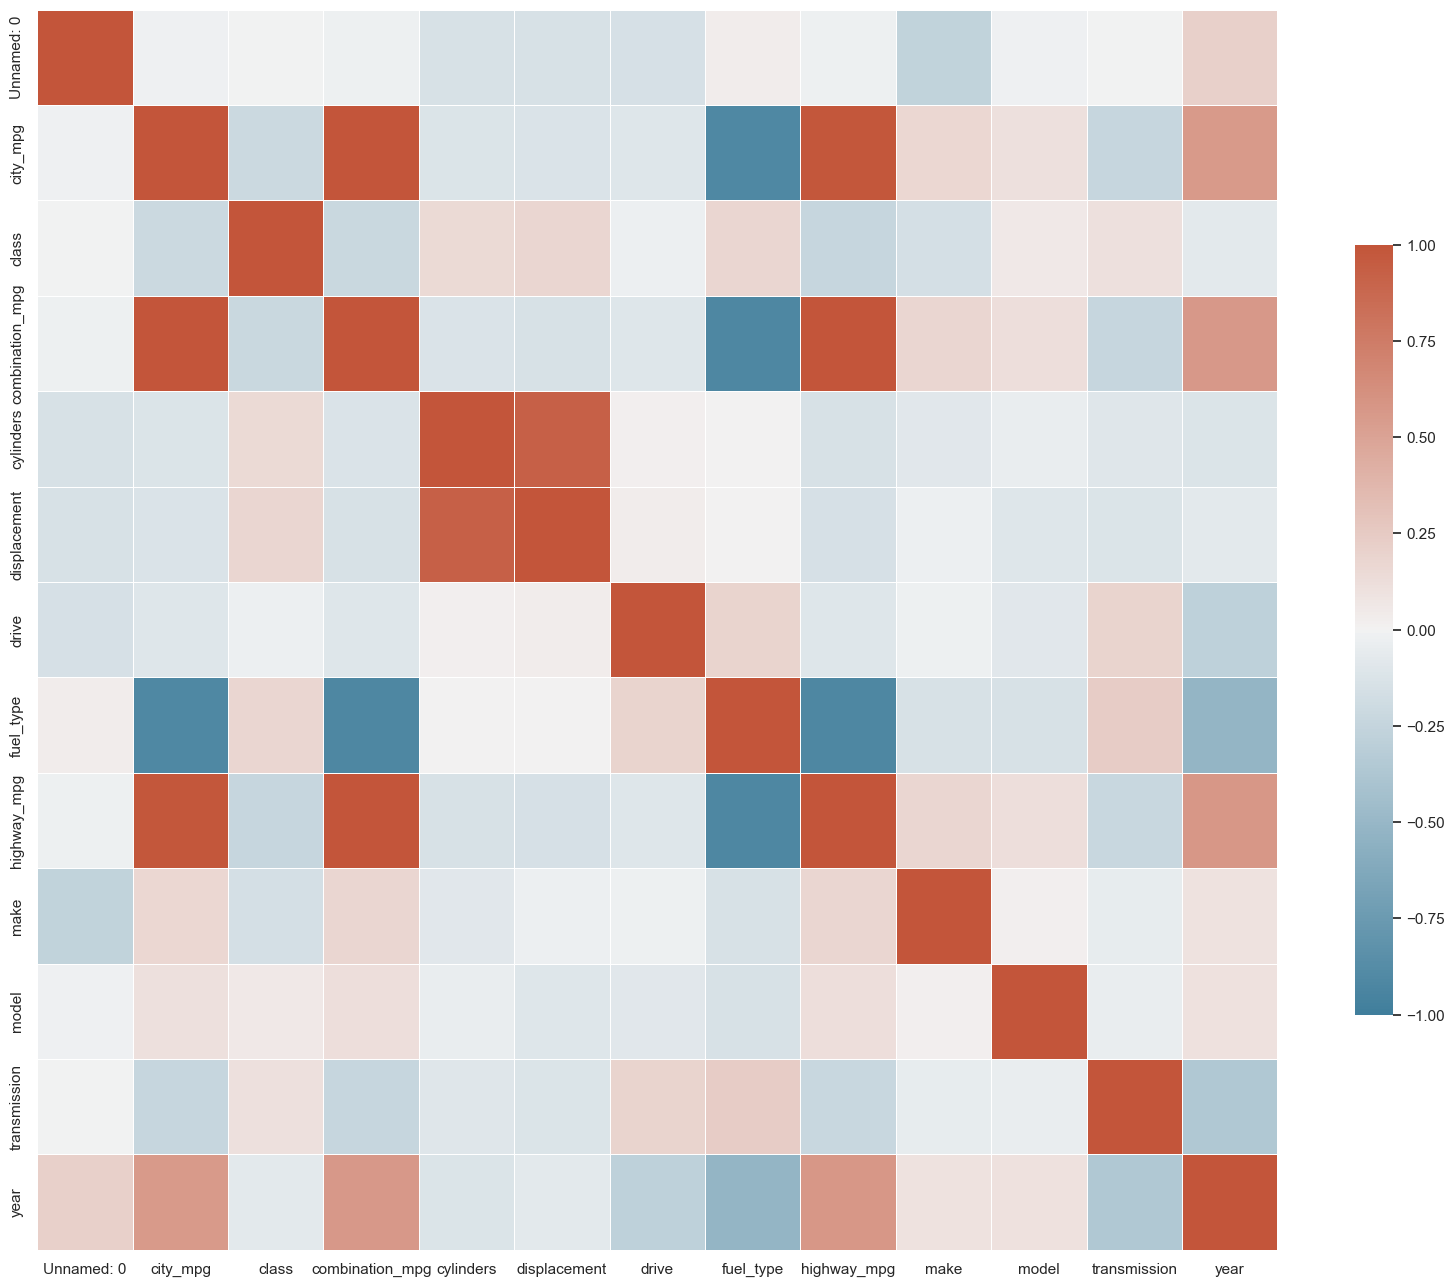

In [101]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)                 #COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

In [102]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
# Resource used: https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed


X = df.drop('fuel_type', axis=1)  # X includes everything except the target column
y = df['fuel_type']  # Y is just the target column

In [103]:
from collections import Counter
import numpy as np
import random
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def generate_label_data(class_labels, weights, N=10000):
    # Generate random labels based on the given class weights
    y = random.choices(class_labels, weights=weights, k=N)
    print("-----GENERATING DATA-----")
    print("unique entries:", Counter(y).keys())
    print("count of labels:", Counter(y).values())
    print("probability of labels:", np.array(list(Counter(y).values())) / N)
    return y

def random_classifier(y_data, class_labels, weights):
    # Generate random predictions based on the distribution of class labels
    ypred = random.choices(class_labels, weights=weights, k=len(y_data))
    
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:", Counter(ypred).values())
    print("probability of prediction:", np.array(list(Counter(ypred).values())) / len(y_data))
    print("accuracy", accuracy_score(y_data, ypred))
    precision, recall, fscore, _ = precision_recall_fscore_support(y_data, ypred, average=None, labels=class_labels)
    print("precision, recall, fscore:", list(zip(precision, recall, fscore)))


In [104]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
# Changed the output structure for better understanding

print("TRAINING SHAPES: \n", f"x_train:\n shape: {x_train.shape}\n type: {type(x_train)}\n", f"y_train:\n shape: {y_train.shape}\n type: {type(y_train)}\n")
print("TEST SHAPES: \n", f"x_test:\n shape: {x_test.shape}\n type: {type(x_test)}\n", f"y_test:\n shape: {y_test.shape}\n type: {type(y_test)}\n")

TRAINING SHAPES: 
 x_train:
 shape: (571, 12)
 type: <class 'pandas.core.frame.DataFrame'>
 y_train:
 shape: (571,)
 type: <class 'pandas.core.series.Series'>

TEST SHAPES: 
 x_test:
 shape: (143, 12)
 type: <class 'pandas.core.frame.DataFrame'>
 y_test:
 shape: (143,)
 type: <class 'pandas.core.series.Series'>



In [106]:
# # INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
# yp_train = model.predict(x_train)
# yp_test = model.predict(x_test)

In [107]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred)
    negative_precision = precision_score(y_data, y_pred)
    positive_recall = recall_score(y_data, y_pred)
    positive_precision = precision_score(y_data, y_pred)
    
    # Print metrics
    print(f"ACCURACY: {accuracy}")
    print(f"NEGATIVE RECALL (Y=0): {negative_recall}")
    print(f"NEGATIVE PRECISION (Y=0): {negative_precision}")
    print(f"POSITIVE RECALL (Y=1): {positive_recall}")
    print(f"POSITIVE PRECISION (Y=1): {positive_precision}")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    plt.show()

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[ 97   0]
 [  0 474]]


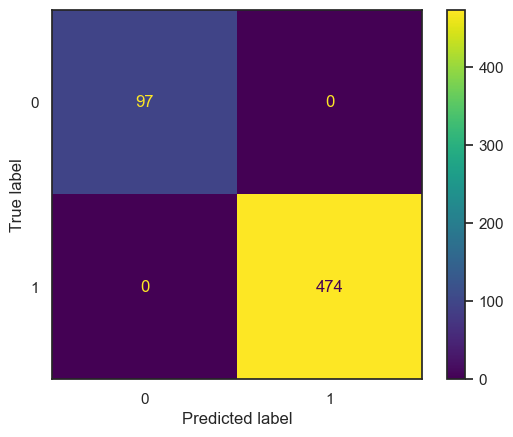

------TEST------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[ 22   0]
 [  0 121]]


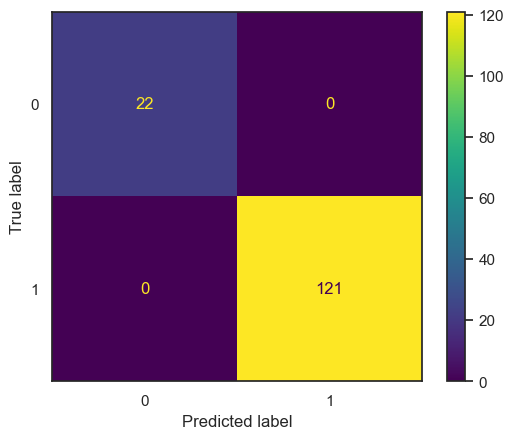

In [108]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

In [109]:
from sklearn import tree
import matplotlib.pyplot as plt

def plot_tree(model, X, Y):
    # Determine class names if Y is categorical and has more than one unique value
    class_names = np.unique(Y).astype(str).tolist() if len(np.unique(Y)) > 1 else None

    plt.figure(figsize=(20, 10))
    tree.plot_tree(model,
                   feature_names=X.columns.tolist(),
                   class_names=class_names,
                   filled=True)
    plt.show()


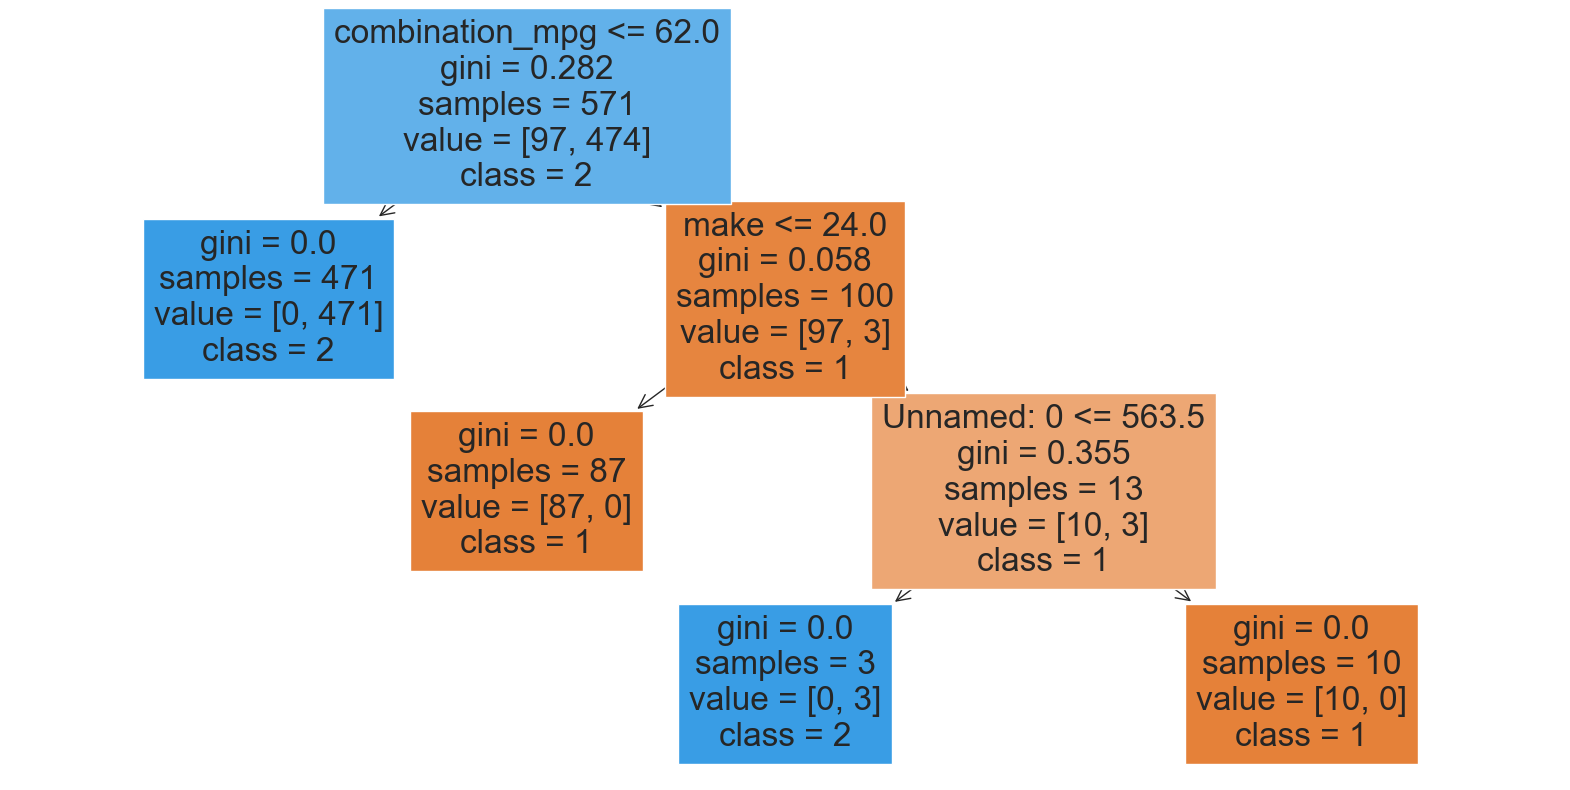

In [110]:
plot_tree(model,X,y)

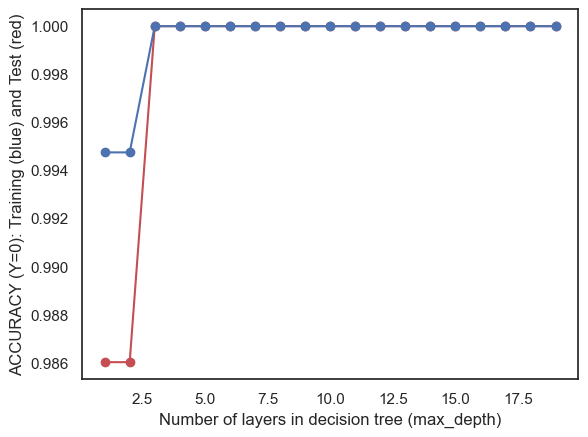

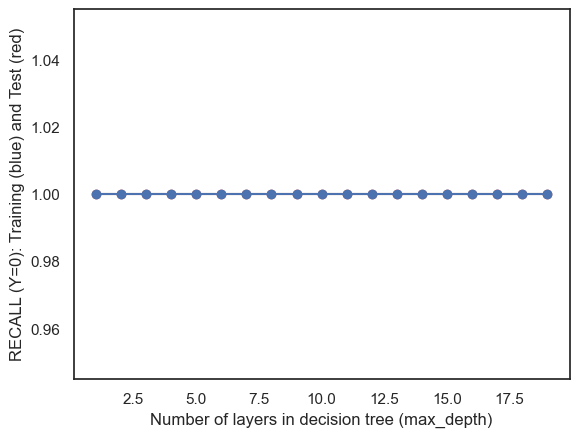

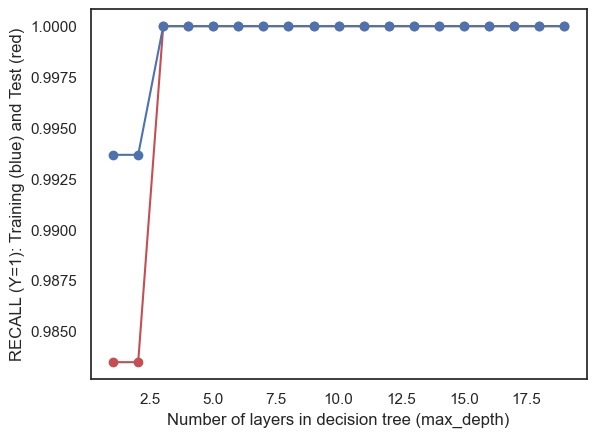

In [111]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=1),recall_score(y_test, yp_test,pos_label=2)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=1),recall_score(y_train, yp_train,pos_label=2)])

test_results=np.array(test_results)
train_results=np.array(train_results)
col=1
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('ACCURACY (Y=0): Training (blue) and Test (red)') 
plt. show()

col=2
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('RECALL (Y=0): Training (blue) and Test (red)') 
plt. show()

col=3
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('RECALL (Y=1): Training (blue) and Test (red)') 
plt. show()

In [112]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[ 97   0]
 [  0 474]]


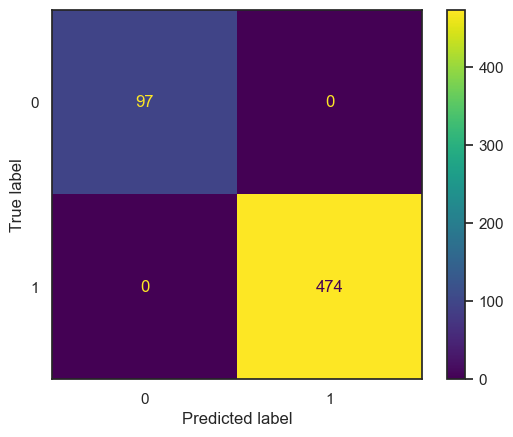

------TEST------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[ 22   0]
 [  0 121]]


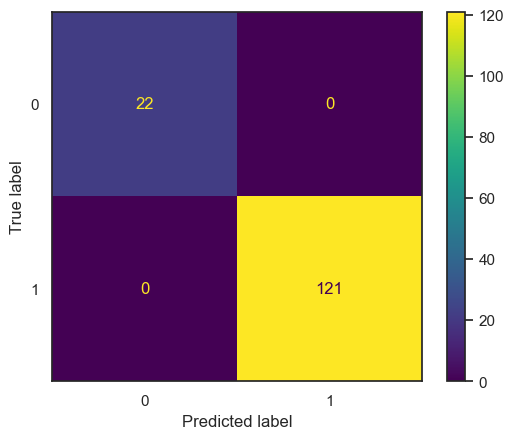

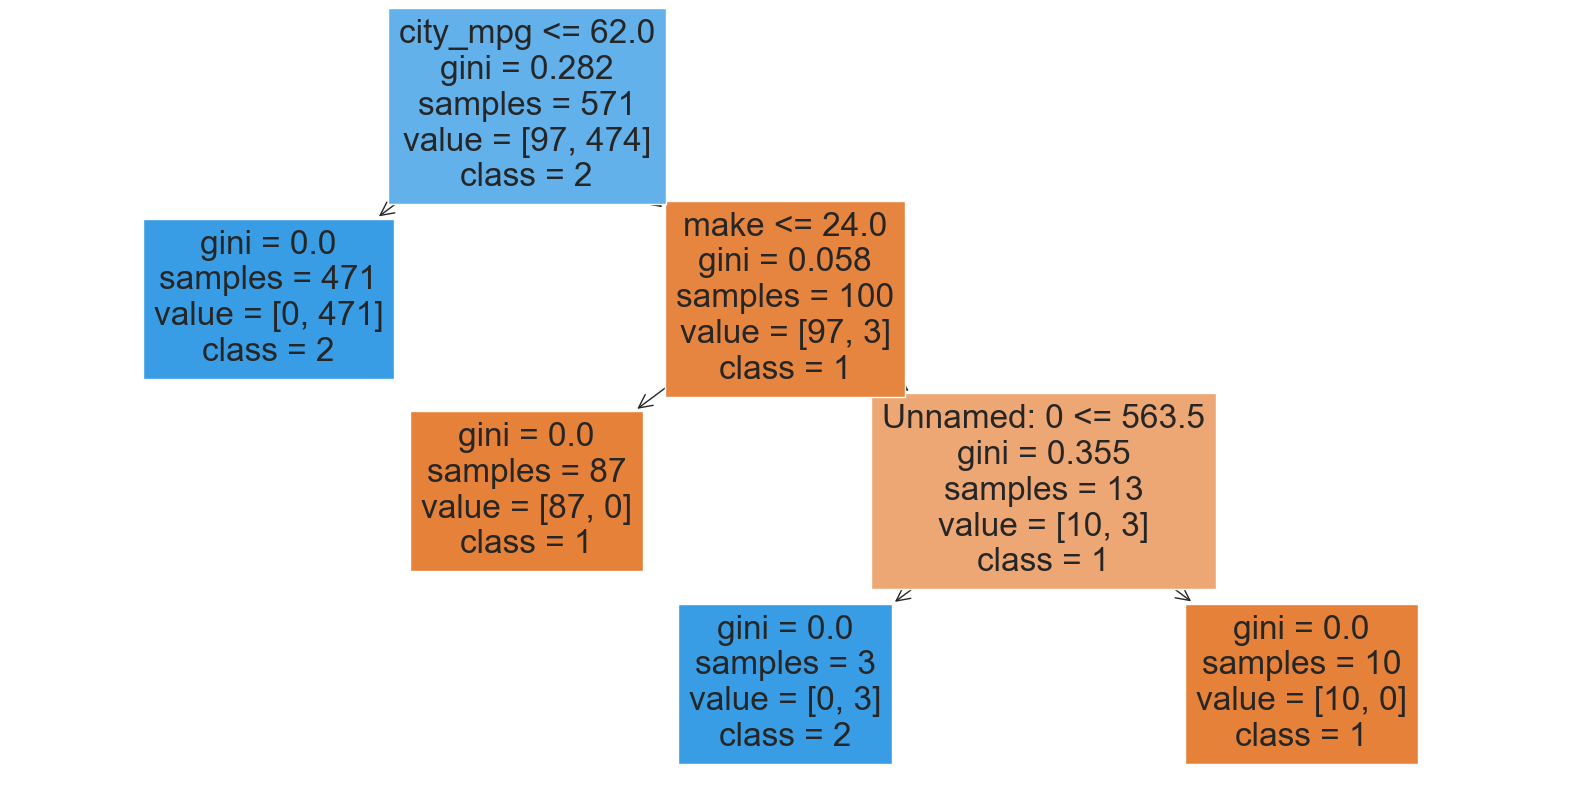

In [113]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,y)